# Chartbuster Project

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
from sklearn.model_selection import train_test_split

In [316]:
train=pd.read_csv('C:\\Users\\user\\Desktop\\ChartbustersParticipantsData\\ChartbustersParticipantsData\\Data_Train.csv')
test=pd.read_csv('C:\\Users\\user\\Desktop\\ChartbustersParticipantsData\\ChartbustersParticipantsData\\Data_Test.csv')

In [317]:
submission=pd.read_excel('C:\\Users\\user\\Desktop\\ChartbustersParticipantsData\\ChartbustersParticipantsData\\Sample_Submission.xlsx')

In [318]:
submission.head()

,Unique_ID,Views
0,562546,7
1,907584,98
2,213013,31
3,340312,51
4,41854,85


In [319]:
submission.drop("Views",inplace=True,axis=1)

In [320]:
train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [321]:
test.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
0,562546,L2Share♫79,all-music,AU,엔플라잉 N.Flying - Rooftop (옥탑방),2019-01-02 09:49:19.000000,26,"5,428",118,2568
1,907584,Morgan Page,danceedm,AU,Morgan Page - In The Air - Episode 246,2015-03-09 17:30:10.000000,18,738,195,155645
2,213013,Dirty Workz,danceedm,AU,Outlander - Devotion (Official HQ Preview),2013-09-18 16:09:03.000000,18,386,96,29446
3,340312,Gucci Mane,all-music,AU,Freaky Gurl,2007-08-14 00:00:00.000000,1,388,19,799410
4,41854,Angga Kecap,rock,AU,Radical Nusantara - Teman,2018-08-10 16:28:54.000000,0,79,1,2


In [322]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


In [323]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19615 entries, 0 to 19614
Data columns (total 10 columns):
Unique_ID     19615 non-null int64
Name          19615 non-null object
Genre         19615 non-null object
Country       19615 non-null object
Song_Name     19615 non-null object
Timestamp     19615 non-null object
Comments      19615 non-null int64
Likes         19615 non-null object
Popularity    19615 non-null object
Followers     19615 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [324]:
train.sort_values(by='Timestamp',inplace=True)

In [325]:
test.sort_values(by='Timestamp',inplace=True)

In [326]:
train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
14326,1120672,Queen,rock,AU,Liar (At The BBC),1973-01-01 00:00:00.000000,87,0,0,0,70299
61074,1120675,Queen,rock,AU,Great King Rat,1973-01-01 00:00:00.000000,104,0,0,0,70299
14653,1120678,Queen,rock,AU,Keep Yourself Alive,1973-01-01 00:00:00.000000,1086,0,14,0,70299
49988,1120674,Queen,rock,AU,Doing All Right,1973-01-01 00:00:00.000000,618,0,14,0,70299
8583,1120676,Queen,rock,AU,My Fairy King,1973-01-01 00:00:00.000000,141,1,5,0,70299


In [327]:
test.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
10923,1120673,Queen,rock,AU,Son And Daughter,1973-01-01 00:00:00.000000,0,0,0,70299
1096,1120679,Queen,rock,AU,Modern Times Rock 'N' Roll,1973-01-01 00:00:00.000000,0,2,0,70299
16948,1382621,Angel,all-music,AU,You Can't Buy Love (Album Version),1979-01-01 00:00:00.000000,2,110,110,14652
17428,1382617,Angel,all-music,AU,Wild And Hot (Album Version),1979-01-01 00:00:00.000000,1,0,0,14652
1278,1382622,Angel,all-music,AU,I'll Bring The Whole World To Your Door (Album...,1979-01-01 00:00:00.000000,1,0,0,14652


In [328]:
# Extracting new Features based on Time Stamp in to Year Month and Day of Week
def extract_time_features(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['year'] = df['Timestamp'].dt.year
    df['month'] = df['Timestamp'].dt.month
    df['day_of_week'] = df['Timestamp'].dt.dayofweek
    del df['Timestamp']
    return df

In [329]:
extract_time_features(train)

,Unique_ID,Name,Genre,Country,Song_Name,Views,Comments,Likes,Popularity,Followers,year,month,day_of_week
14326,1120672,Queen,rock,AU,Liar (At The BBC),87,0,0,0,70299,1973,1,0
61074,1120675,Queen,rock,AU,Great King Rat,104,0,0,0,70299,1973,1,0
14653,1120678,Queen,rock,AU,Keep Yourself Alive,1086,0,14,0,70299,1973,1,0
49988,1120674,Queen,rock,AU,Doing All Right,618,0,14,0,70299,1973,1,0
8583,1120676,Queen,rock,AU,My Fairy King,141,1,5,0,70299,1973,1,0
77876,1382623,Angel,all-music,AU,Just Can't Take It (Album Version),75,1,0,0,14652,1979,1,0
45568,1382618,Angel,all-music,AU,Waited Long Time (Album Version),62,1,2,1,14652,1979,1,0
52138,1382615,Angel,all-music,AU,I'll Never Fall In Love Again (Album Version),208,2,1,1,14652,1979,1,0
49204,1382616,Angel,all-music,AU,L.A. Lady (Album Version),135,2,1,1,14652,1979,1,0
26718,1382619,Angel,all-music,AU,Bad Time (Album Version),66,1,0,0,14652,1979,1,0


In [330]:
extract_time_features(test)

,Unique_ID,Name,Genre,Country,Song_Name,Comments,Likes,Popularity,Followers,year,month,day_of_week
10923,1120673,Queen,rock,AU,Son And Daughter,0,0,0,70299,1973,1,0
1096,1120679,Queen,rock,AU,Modern Times Rock 'N' Roll,0,2,0,70299,1973,1,0
16948,1382621,Angel,all-music,AU,You Can't Buy Love (Album Version),2,110,110,14652,1979,1,0
17428,1382617,Angel,all-music,AU,Wild And Hot (Album Version),1,0,0,14652,1979,1,0
1278,1382622,Angel,all-music,AU,I'll Bring The Whole World To Your Door (Album...,1,0,0,14652,1979,1,0
605,1120671,Queen,rock,AU,Under Pressure,6,"2,020",74,70299,1982,1,4
16748,1120668,Queen,rock,AU,One Vision (Live),0,0,0,70299,1986,1,2
14202,1120476,Queen,rock,AU,God Save The Queen,0,3,0,70299,1991,1,1
13406,1120630,Queen,rock,AU,Leaving Home Ain't Easy (Album Version),0,2,0,70299,1991,1,1
1574,1120592,Queen,rock,AU,Friends Will Be Friends,0,3,0,70299,1991,1,1


In [331]:
# Bringing it into same scale
def treatment1(df):
    df.Likes=df.Likes.str.replace(',','')
    df["Likes"]=df['Likes'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
    df.Popularity=df.Popularity.str.replace(',','')
    df["Popularity"]=df['Popularity'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [332]:
treatment1(train)
treatment1(test)

In [333]:
train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Views,Comments,Likes,Popularity,Followers,year,month,day_of_week
14326,1120672,Queen,rock,AU,Liar (At The BBC),87,0,0,0,70299,1973,1,0
61074,1120675,Queen,rock,AU,Great King Rat,104,0,0,0,70299,1973,1,0
14653,1120678,Queen,rock,AU,Keep Yourself Alive,1086,0,14,0,70299,1973,1,0
49988,1120674,Queen,rock,AU,Doing All Right,618,0,14,0,70299,1973,1,0
8583,1120676,Queen,rock,AU,My Fairy King,141,1,5,0,70299,1973,1,0


In [334]:
train['releases_per_year1']=train.groupby(['Name','year'])['Song_Name'].cumcount()
test['releases_per_year1']=test.groupby(['Name','year'])['Song_Name'].cumcount()

In [335]:
total=pd.concat([train,test],axis=0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [336]:
# Feature Extraction making more features :
total['releases_per_year']=total.groupby(['Name'])['Song_Name'].cumcount()
total['Likes_moving_sum']=total.groupby(['Name'])['Likes'].cumsum()
total['Likes_moving_average']=total['Likes_moving_sum']/total['releases_per_year']
total["Average_likes_Name"]=total.groupby(['Name'])['Likes'].transform('mean')
total["Average_Popularity_Name"]=total.groupby(['Name'])['Popularity'].transform('mean')

In [337]:
total.head()

,Comments,Country,Followers,Genre,Likes,Name,Popularity,Song_Name,Unique_ID,Views,day_of_week,month,releases_per_year1,year,releases_per_year,Likes_moving_sum,Likes_moving_average,Average_likes_Name,Average_Popularity_Name
14326,0,AU,70299,rock,0,Queen,0,Liar (At The BBC),1120672,87.0,0,1,0,1973,0,0,NaN,230.435414,1.512337
61074,0,AU,70299,rock,0,Queen,0,Great King Rat,1120675,104.0,0,1,1,1973,1,0,0.000000,230.435414,1.512337
14653,0,AU,70299,rock,14,Queen,0,Keep Yourself Alive,1120678,1086.0,0,1,2,1973,2,14,7.000000,230.435414,1.512337
49988,0,AU,70299,rock,14,Queen,0,Doing All Right,1120674,618.0,0,1,3,1973,3,28,9.333333,230.435414,1.512337
8583,1,AU,70299,rock,5,Queen,0,My Fairy King,1120676,141.0,0,1,4,1973,4,33,8.250000,230.435414,1.512337


In [338]:
# Creating the Dummies for Genere Column
cols=["Genre"]
dummy=pd.get_dummies(total[cols],drop_first=True)
total=pd.concat([total,dummy],axis=1)
total.drop(cols,axis=1,inplace=True)

In [339]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
total.Name=le.fit_transform(total.Name)

In [340]:
train.shape

(78458, 14)

In [341]:
# Spliting train and test Data Frame from total
train=total.iloc[:78458]
test=total.iloc[78458:]

In [342]:
# Droping some of the categorical features for Modeling
train.drop(["Unique_ID","Country","Song_Name","releases_per_year",'Likes_moving_sum'],axis=1,inplace=True)
test.drop(["Unique_ID","Country","Song_Name","releases_per_year",'Likes_moving_sum'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [343]:
train.head()

,Comments,Followers,Likes,Name,Popularity,Views,day_of_week,month,releases_per_year1,year,...,Genre_folksingersongwriter,Genre_hiphoprap,Genre_indie,Genre_latin,Genre_metal,Genre_pop,Genre_rbsoul,Genre_reggaeton,Genre_rock,Genre_trap
14326,0,70299,0,782,0,87.0,0,1,0,1973,...,0,0,0,0,0,0,0,0,1,0
61074,0,70299,0,782,0,104.0,0,1,1,1973,...,0,0,0,0,0,0,0,0,1,0
14653,0,70299,14,782,0,1086.0,0,1,2,1973,...,0,0,0,0,0,0,0,0,1,0
49988,0,70299,14,782,0,618.0,0,1,3,1973,...,0,0,0,0,0,0,0,0,1,0
8583,1,70299,5,782,0,141.0,0,1,4,1973,...,0,0,0,0,0,0,0,0,1,0


In [344]:
# Replacing inf value to null
train=train.replace([np.inf, -np.inf], np.nan)

In [345]:

train.Likes_moving_average=train.Likes_moving_average.fillna(0)

In [346]:
test=test.replace([np.inf, -np.inf], np.nan)

In [347]:
test.Likes_moving_average=test.Likes_moving_average.fillna(0)

In [348]:
test.drop("Views",axis=1,inplace=True)

In [349]:
test.head()

,Comments,Followers,Likes,Name,Popularity,day_of_week,month,releases_per_year1,year,Likes_moving_average,...,Genre_folksingersongwriter,Genre_hiphoprap,Genre_indie,Genre_latin,Genre_metal,Genre_pop,Genre_rbsoul,Genre_reggaeton,Genre_rock,Genre_trap
10923,0,70299,0,782,0,0,1,0,1973,224.272563,...,0,0,0,0,0,0,0,0,1,0
1096,0,70299,2,782,0,0,1,1,1973,223.872072,...,0,0,0,0,0,0,0,0,1,0
16948,2,14652,110,61,110,0,1,0,1979,497.491525,...,0,0,0,0,0,0,0,0,0,0
17428,1,14652,0,61,0,0,1,1,1979,493.310924,...,0,0,0,0,0,0,0,0,0,0
1278,1,14652,0,61,0,0,1,2,1979,489.200000,...,0,0,0,0,0,0,0,0,0,0


In [350]:
train.sort_index(inplace=True)
test.sort_index(inplace=True)

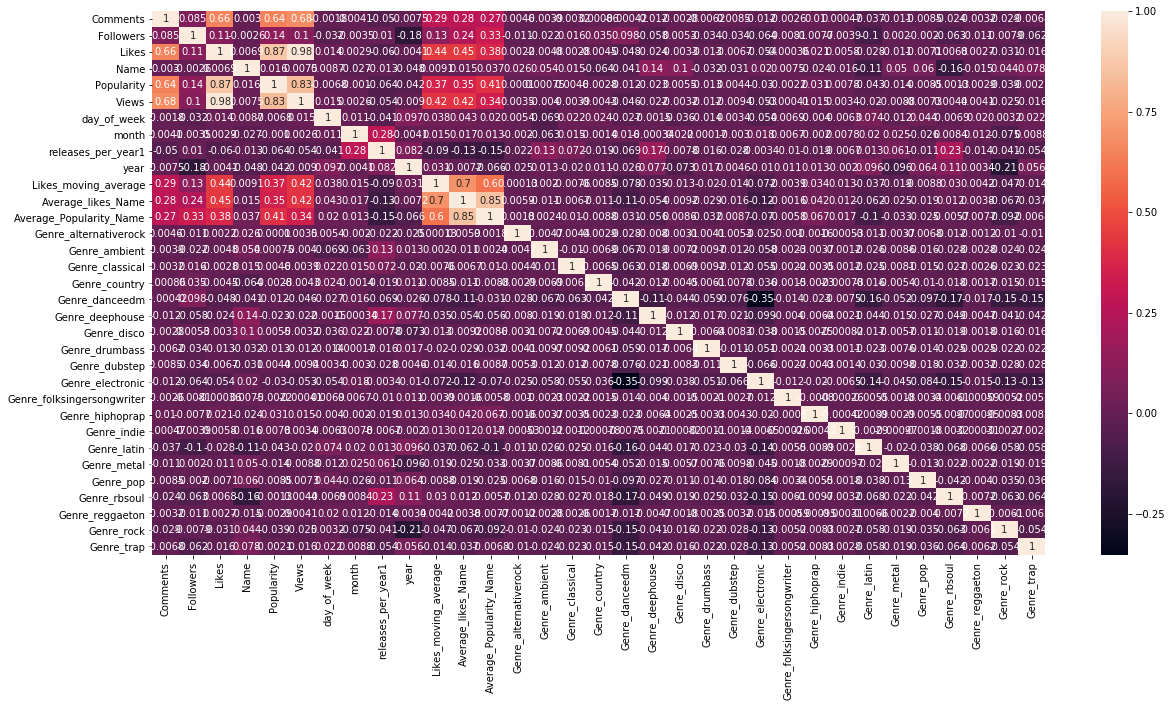

In [351]:
# Heat Map
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

In [356]:
X_train=train.drop(["Views",'releases_per_year1'],axis=1)
y_train=train.Views 
test1=test.drop(['releases_per_year1'],axis=1)

## Applying XGB Regressor

In [1]:
## Model 1

In [353]:
from xgboost import XGBRegressor
xgb1=XGBRegressor(n_estimators=2500,learning_rate=0.1,max_depth=6)
model_xgb1=xgb1.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:55:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [357]:
y_test_xgb_pred1=xgb1.predict(test1)

In [358]:
y_test_xgb_pred1

array([225146.25 ,  31161.14 ,  18199.744, ...,   4341.657,  76863.8  ,
        23110.762], dtype=float32)

In [147]:
y_test_xgb_pred1

array([263853.44 ,  32155.277,  10352.59 , ...,   5512.228,  84906.65 ,
        18642.363], dtype=float32)

In [ ]:
## Model 2

In [ ]:
from xgboost import XGBRegressor
xgb2=XGBRegressor(n_estimators=40,learning_rate=1,max_depth=3)
model_xgb2=xgb2.fit(X_train_new,y_train)

In [382]:
y_test_xgb_pred2=xgb2.predict(test_new)

In [385]:
y_test_xgb_pred2

array([288596.5   ,  24484.707 ,  24484.707 , ...,   8035.0137,
       160465.47  ,  24484.707 ], dtype=float32)

In [ ]:
# Checking Cross Val Score of xgb2 instance

In [165]:
from sklearn.model_selection import cross_val_score
all_scores = cross_val_score(estimator=xgb2, X=X_train, y=y_train, cv=5,scoring='neg_root_mean_squared_error')

[17:15:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:30:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:44:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:59:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:13:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [166]:
all_scores

array([-630364.57841899, -630408.5756722 , -588551.24433542,
       -983705.20608368, -580120.98361246])

In [155]:
all_scores

array([-630557.01240003, -630703.89673182, -588633.70721052,
       -983877.56585807, -579979.99865044])

In [43]:
all_scores

array([-635023.89667237, -635214.61542144, -555324.41267782,
       -980259.42236904, -567817.66075703])

In [374]:
X_train.head()

,Comments,Followers,Likes,Name,Popularity,day_of_week,month,year,Likes_moving_average,Average_likes_Name,...,Genre_folksingersongwriter,Genre_hiphoprap,Genre_indie,Genre_latin,Genre_metal,Genre_pop,Genre_rbsoul,Genre_reggaeton,Genre_rock,Genre_trap
0,4,119563,499,403,97,4,3,2018,806.310976,768.758790,...,0,0,0,0,0,0,0,0,0,0
1,17,2141,49,268,17,0,6,2016,0.000000,486.866667,...,0,0,0,0,0,0,0,0,0,0
2,11,22248,312,637,91,4,5,2015,1035.351351,445.461140,...,0,0,0,0,0,0,0,0,0,0
3,2,393655,2400,366,76,3,6,2017,5760.714286,4090.314825,...,0,0,0,0,0,0,1,0,0,0
4,81,201030,3031,979,699,5,9,2016,2681.540000,2314.546784,...,0,0,0,0,0,0,0,0,0,0


In [389]:
X_train_new1=train.drop(['Likes_moving_average','Followers','day_of_week','month','year','Average_likes_Name','Average_Popularity_Name','Views','releases_per_year1'],axis=1)
test_new1=test.drop(['Likes_moving_average','Followers','day_of_week','month','year','Average_likes_Name','Average_Popularity_Name','releases_per_year1'],axis=1)

In [ ]:
## model 3

In [391]:
from xgboost import XGBRegressor
xgb3=XGBRegressor(n_estimators=70,learning_rate=1,max_depth=2)
model_xgb3=xgb3.fit(X_train_new1,y_train)
prediction_train_xgb3=model_xgb3.predict(X_train_new1)

[02:08:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [392]:
y_test_xgb_pred3=xgb3.predict(test_new1)

In [393]:
y_test_xgb_pred3

array([254311.47 ,  50998.566,   8937.607, ...,   8937.607, 254311.47 ,
         8937.607], dtype=float32)

In [ ]:
# Model 4

In [394]:
from xgboost import XGBRegressor
xgb4=XGBRegressor(n_estimators=70,learning_rate=1,max_depth=3)
model_xgb4=xgb4.fit(X_train_new1,y_train)
prediction_train_xgb4=model_xgb4.predict(X_train_new1)

[02:08:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [395]:
y_test_xgb_pred4=xgb4.predict(test_new1)

In [473]:
# Giving weights to predictions of moedel 1 2 and 3 and saving it in y_test_final
y_test_final=y_test_xgb_pred1*0.57+y_test_xgb_pred3*0.33+y_test_xgb_pred2*0.1

In [474]:
submission=pd.read_excel('C:\\Users\\user\\Desktop\\ChartbustersParticipantsData\\ChartbustersParticipantsData\\Sample_Submission.xlsx')

In [475]:
submission.drop("Views",inplace=True,axis=1)

In [476]:
# Assigning y_test_final value in submissions
submission["Views"]=y_test_final

In [477]:
submission.head(5)

,Unique_ID,Views
0,562546,241115.812500
1,907584,37039.843750
2,213013,15771.736328
3,340312,18569.759766
4,41854,3757.772705
